In [1]:
import numpy as np
import pandas as pd
import statsmodels.stats.multitest as smm

### P Value Analysis of Slow Method

In [2]:
pValFile = '../output/pValSlw5k.tsv'
pValDf = pd.read_csv(pValFile, sep='\t', index_col=0)
pValDf = np.abs(pValDf)
pValDf.head()

,AATF,ABCA1,ABCA3,ABCB1,ABL1,ACTL6A,ADH1B,AGO1,AGO2,AGO3,...,ZFHX3,ZFP36,ZHX2,ZIC1,ZNF148,ZNF175,ZNF24,ZNF300,ZNF350,ZNF382
midpoint_AAACCTGCACCCAGTG-1,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000
midpoint_AAACCTGCAGCTTAAC-1,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.5801
midpoint_AAACCTGGTGTGCGTC-1,0.0,0.0,0.0,0.0376,0.0000,0.8233,0.0,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.4763,0.0,0.0,0.0,0.0,0.0,0.0000
midpoint_AAACCTGGTTGAACTC-1,0.0,0.0,0.0,0.6227,0.9659,0.1421,0.0,0.2415,0.2415,0.2415,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0763
midpoint_AAACGGGAGGATGGTC-1,0.0,0.0,0.0,0.5908,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,...,0.0,0.0,0.0,0.8794,0.0,0.0,0.0,0.0,0.0,0.1324


In [3]:
adjustedPVals = pd.DataFrame(columns=pValDf.columns, index=pValDf.index)
actRej = pd.DataFrame(columns=pValDf.columns, index=pValDf.index)


for (tf, pVals) in pValDf.iteritems():
    pVals = pVals.dropna()
    pV_df = pd.DataFrame(index=pVals.index, columns=['pVal'], data=pVals.values)
    pV_df.sort_values(by='pVal', inplace=True)

    reject, adj_p_val = smm.fdrcorrection(pV_df['pVal'].values, method='i', is_sorted=True, alpha=0.1)
    pV_df[tf] = adj_p_val

    # Insert pV_df into adjustedPVals by column by index
    adjustedPVals.loc[pV_df.index.values, tf] = pV_df[tf].values
    actRej.loc[pV_df.index.values, tf] = reject

adjustedPVals.to_csv('../output/adjustedPValsSlw5k.tsv', sep='\t')
actRej.to_csv('../output/actRejSlw5k.tsv', sep='\t')

In [4]:
aRS_df = pd.read_csv('../output/actRejSlw5k.tsv', sep='\t', index_col=0)
hashSX0 = aRS_df.sum(axis=0)
hashSX1 = aRS_df.sum(axis=1).to_frame()

### p-value Analysis of Fast Method

In [69]:
pValFile = '../output/pValFst.tsv'

pValDf = pd.read_csv(pValFile, sep='\t', index_col=0)
pValDf.head()

adjustedPVals = pd.DataFrame(columns=pValDf.columns, index=pValDf.index)
actRej = pd.DataFrame(columns=pValDf.columns, index=pValDf.index)

for (tf, pVals) in pValDf.iteritems():
    pV_df = pd.DataFrame(index=pVals.index, columns=['pVal'], data=np.abs(pVals.values))
    pV_df.sort_values(by='pVal', inplace=True)

    reject, adj_p_val = smm.fdrcorrection(pV_df['pVal'].values, method='i', is_sorted=True, alpha=0.1)
    pV_df[tf] = adj_p_val

    # Insert pV_df into adjustedPVals by column by index
    adjustedPVals.loc[pV_df.index.values, tf] = pV_df[tf].values
    actRej.loc[pV_df.index.values, tf] = reject

adjustedPVals.to_csv('../output/adjustedPValsFst.tsv', sep='\t')
actRej.to_csv('../output/actRejFst.tsv', sep='\t')

In [70]:
aRF_df = pd.read_csv('../output/actRejFst.tsv', sep='\t', index_col=0)
hashFX0 = aRF_df.sum(axis=0)
hashFX1 = aRF_df.sum(axis=1).to_frame()

## -------------------------------------------

In [ ]:
df = pd.DataFrame(index=['C1', 'C2', 'C3'],
                  columns=['Gene1 pVal', 'Gene2 pVal', 'Gene3 pVal', 'Gene4 pVal', 'Gene5 pVal', 'Gene6 pVal'],
                  data=[[0.021, 0.005, 0.073, 0.001, 0.034, 0.018], [0.23, 0.03, 0.003, 0.001, 0.034, 0.018],
                        [0.021, 0.005, 0.73, 0.10, 0.34, 0.4]])
df.head()

In [ ]:

# Example DataFrame
df = pd.DataFrame(index=['C1', 'C2', 'C3'],
                  columns=['Gene1 pVal', 'Gene2 pVal', 'Gene3 pVal', 'Gene4 pVal', 'Gene5 pVal', 'Gene6 pVal'],
                  data=[[0.021, 0.005, 0.073, 0.001, 0.034, 0.018], [0.23, 0.03, 0.003, 0.001, 0.034, 0.018],
                        [0.021, 0.005, 0.73, 0.10, 0.34, 0.4]])

# Iterate over the cells and apply Benjamini-Hochberg procedure
adjusted_dfs = {}
for cell in df.index:
    # Get the p-values for the current cell
    p_values = df.loc[cell].values

    # Perform Benjamini-Hochberg procedure
    reject, adjusted_p_values, _, _ = smm.multipletests(p_values, method='fdr_bh')

    # Create a new DataFrame with the adjusted p-values
    adjusted_df = pd.DataFrame(index=[cell], columns=df.columns, data=[adjusted_p_values])

    # Store the adjusted DataFrame for the current cell
    adjusted_dfs[cell] = adjusted_df

# Concatenate the adjusted DataFrames for all cells
adjusted_combined = pd.concat(adjusted_dfs.values())

# Print the original DataFrame and the adjusted DataFrames for each cell
print("Original DataFrame:")
print(df)
print("\nAdjusted DataFrames:")
for cell, adjusted_df in adjusted_dfs.items():
    print(f"\nCell {cell}:")
    print(adjusted_df)
print("\nCombined Adjusted DataFrame:")
print(adjusted_combined)


In [4]:
pVal = pd.read_csv('../output/pValSlw.tsv', sep='\t')
pVal.head()

,Unnamed: 0,AATF,ABCA1,ABCA3,ABCB1,ABL1,ACTL6A,ADH1B,AGO1,AGO2,...,ZFHX3,ZFP36,ZHX2,ZIC1,ZNF148,ZNF175,ZNF24,ZNF300,ZNF350,ZNF382
0,BPK.12x.4NQO_AAACCTGCACCCAGTG.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BPK.12x.4NQO_AAACCTGCAGCTTAAC.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62987
2,BPK.12x.4NQO_AAACCTGGTGTGCGTC.1,NaN,NaN,NaN,0.85533,NaN,-0.96227,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.71356,NaN,NaN,NaN,NaN,NaN,NaN
3,BPK.12x.4NQO_AAACCTGGTTGAACTC.1,NaN,NaN,NaN,0.13155,-0.39036,-0.78387,NaN,-0.90361,-0.90361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.78761
4,BPK.12x.4NQO_AAACGGGAGGATGGTC.1,NaN,NaN,NaN,-0.08332,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.69834,NaN,NaN,NaN,NaN,NaN,0.00181


In [5]:

adPVal = pd.read_csv('../output/adjustedPValsSlw.tsv', sep='\t')
adPVal.shape

(9089, 691)

In [6]:
arnt = pVal['ARNT']
arnt.dropna(inplace=True, axis=0)
arnt

0      -0.82671
1      -0.18315
2      -0.03682
3      -0.51154
4      -0.27977
         ...   
9084   -0.69335
9085    0.25115
9086    0.36448
9087    0.22080
9088    0.85992
Name: ARNT, Length: 9081, dtype: float64

In [7]:
arnt_ad = adPVal['ARNT']
arnt_ad.dropna(inplace=True, axis=0)
arnt_ad

0       0.946250
1       0.809159
2       0.407523
3       0.924526
4       0.854643
          ...   
9084    0.889178
9085    0.981146
9086    0.784459
9087    0.711414
9088    0.933149
Name: ARNT, Length: 9081, dtype: float64

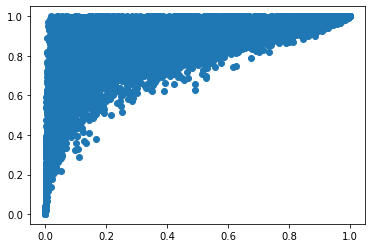

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(np.abs(arnt), arnt_ad)
plt.show()

In [18]:
pp = pd.DataFrame(data=[list(np.abs(arnt.values)), list(arnt_ad.values)]).T
pp.shape

(9081, 2)

In [19]:
pp.columns = ['p', 'ad_p']
pp.head()

,p,ad_p
0,0.82671,0.946250
1,0.18315,0.809159
2,0.03682,0.407523
3,0.51154,0.924526
4,0.27977,0.854643


In [20]:
pp.sort_values(by=['p'], inplace=True)
pp.head()

,p,ad_p
8023,0.00001,0.00129
187,0.00001,0.00128
4033,0.00001,0.00361
8142,0.00002,0.00182
8111,0.00002,0.00250


In [21]:
pp.to_csv("../output/pValueComp.tsv", index=False)

In [27]:
pp.reset_index(inplace=True)
pp = pp[['p', 'ad_p']]

rj, sd_p_v, _, _ = smm.multipletests(pp['p'], method='fdr_bh', is_sorted='True')

pp['new_ad_p'] = sd_p_v
pp['acpt'] = rj

pp.head()

,p,ad_p,new_ad_p,acpt
0,0.00001,0.00129,0.030270,True
1,0.00001,0.00128,0.030270,True
2,0.00001,0.00361,0.030270,True
3,0.00002,0.00182,0.036324,True
4,0.00002,0.00250,0.036324,True


In [29]:
pp.to_csv('../output/pValueComp2.tsv', index=False)

In [17]:
pV = pd.read_csv('../output/pValSlw.tsv', sep='\t', index_col=0)
tt = np.sign(pV)
pV = np.sign(pV) * -np.log(np.abs(pV))
pV.fillna(0, inplace=True)
pV.to_csv('../output/tf_scores_t2.tsv', sep='\t')

In [11]:
lg = -np.log(np.abs(pV))
lg

,AATF,ABCA1,ABCA3,ABCB1,ABL1,ACTL6A,ADH1B,AGO1,AGO2,AGO3,...,ZFHX3,ZFP36,ZHX2,ZIC1,ZNF148,ZNF175,ZNF24,ZNF300,ZNF350,ZNF382
BPK.12x.4NQO_AAACCTGCACCCAGTG.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.4NQO_AAACCTGCAGCTTAAC.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462242
BPK.12x.4NQO_AAACCTGGTGTGCGTC.1,NaN,NaN,NaN,0.156268,NaN,0.038460,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.337489,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.4NQO_AAACCTGGTTGAACTC.1,NaN,NaN,NaN,2.028368,0.940686,0.243512,NaN,0.101357,0.101357,0.101357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238752
BPK.12x.4NQO_AAACGGGAGGATGGTC.1,NaN,NaN,NaN,2.485067,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.359049,NaN,NaN,NaN,NaN,NaN,6.314428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPK.12x.vehicle_TTTGTCAGTTCTGAAC.1,NaN,NaN,NaN,NaN,NaN,1.223699,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.vehicle_TTTGTCATCAGGATCT.1,NaN,NaN,NaN,1.360978,NaN,0.320536,NaN,0.211388,0.211388,0.211388,...,NaN,NaN,NaN,NaN,NaN,NaN,0.215647,NaN,NaN,1.586992
BPK.12x.vehicle_TTTGTCATCATCATTC.1,NaN,NaN,NaN,1.324785,NaN,3.432069,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.vehicle_TTTGTCATCATGCATG.1,NaN,NaN,NaN,0.464960,NaN,1.161712,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.984222,NaN,NaN,NaN


In [12]:
yy = lg * tt
yy

,AATF,ABCA1,ABCA3,ABCB1,ABL1,ACTL6A,ADH1B,AGO1,AGO2,AGO3,...,ZFHX3,ZFP36,ZHX2,ZIC1,ZNF148,ZNF175,ZNF24,ZNF300,ZNF350,ZNF382
BPK.12x.4NQO_AAACCTGCACCCAGTG.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.4NQO_AAACCTGCAGCTTAAC.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.462242
BPK.12x.4NQO_AAACCTGGTGTGCGTC.1,NaN,NaN,NaN,0.156268,NaN,-0.038460,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.337489,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.4NQO_AAACCTGGTTGAACTC.1,NaN,NaN,NaN,2.028368,-0.940686,-0.243512,NaN,-0.101357,-0.101357,-0.101357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.238752
BPK.12x.4NQO_AAACGGGAGGATGGTC.1,NaN,NaN,NaN,-2.485067,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.359049,NaN,NaN,NaN,NaN,NaN,6.314428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPK.12x.vehicle_TTTGTCAGTTCTGAAC.1,NaN,NaN,NaN,NaN,NaN,1.223699,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.vehicle_TTTGTCATCAGGATCT.1,NaN,NaN,NaN,-1.360978,NaN,-0.320536,NaN,-0.211388,-0.211388,-0.211388,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.215647,NaN,NaN,1.586992
BPK.12x.vehicle_TTTGTCATCATCATTC.1,NaN,NaN,NaN,-1.324785,NaN,-3.432069,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPK.12x.vehicle_TTTGTCATCATGCATG.1,NaN,NaN,NaN,0.464960,NaN,-1.161712,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.984222,NaN,NaN,NaN
